In [34]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product, combinations



# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve



import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


import os
import sys 
sys.path.append(os.path.abspath("../../../src"))   
import soporte_ajuste_modelos as f


pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
df_preprocesado=pd.read_pickle("../../../datos/EF/Datos_modelos/Modelo_amplias/amplias_preprocesadas.pkl")

In [36]:
df_preprocesado.head()

,idq_pv,calefac,naseos,ndormito,metrosvi,annoedifinterv,estadoedif,accesoedif,ascensor,nplazasgar,aguacalcent,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,erfotov
0,0.01,0.53,0.10,0.57,0.23,0.18,0.19,0.31,0.56,0.10,0.35,0.03,-0.24,0.42,-1.96,0
1,0.01,0.53,0.01,0.29,0.30,0.18,0.19,0.69,0.56,0.17,0.65,0.03,-0.24,0.42,-1.96,0
2,0.01,0.53,0.10,0.57,0.47,0.18,0.19,0.31,0.56,0.17,0.65,0.03,-0.24,0.42,-1.96,0
3,0.01,0.53,0.21,0.57,0.47,0.18,0.33,0.69,0.44,0.38,0.35,0.03,0.68,0.42,-1.96,0
4,0.01,0.53,0.68,0.57,0.47,0.03,0.19,0.69,0.56,0.38,0.65,0.03,-0.24,0.42,-1.96,0


## REGRESIÓN LOGÍSTICA

### Modelo A

In [37]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "erfotov",train_size=0.8)
modelos_clasificacion.ajustar_modelo("logistic_regression", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../../transformers/desechar",nombre_modelo_guardar="modelo_amplias_logA_1.pkl")

-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=100, random_state=42, solver='liblinear')
-------------------------------------------------
Los parametros actuales son:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [100, 200, 500]}

In [38]:
modelos_clasificacion.calcular_metricas(modelo_nombre="logistic_regression").T

,accuracy,precision,recall,f1,kappa,auc
train,0.69,0.68,0.69,0.68,0.31,0.74
test,0.69,0.68,0.69,0.68,0.31,0.74


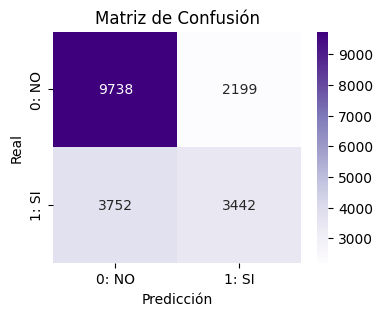

In [39]:
modelos_clasificacion.plot_matriz_confusion("logistic_regression", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

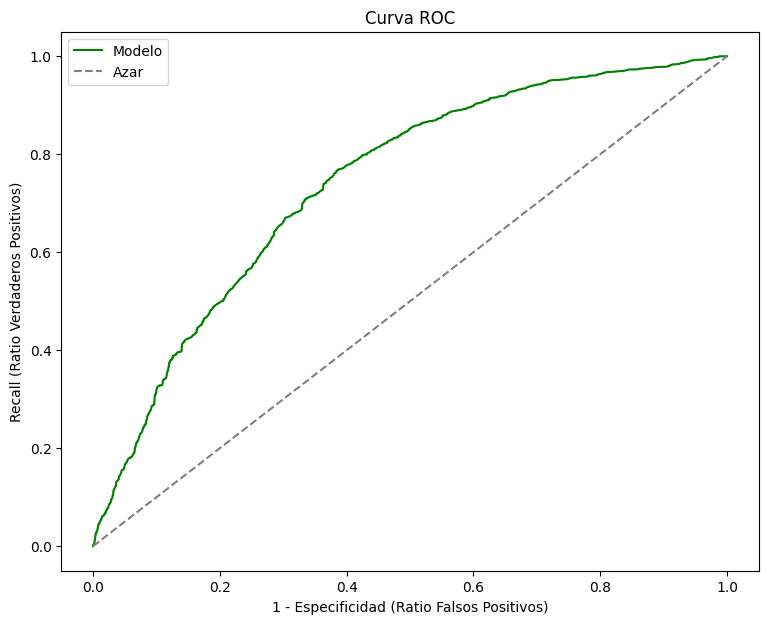

In [40]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7), color="green")

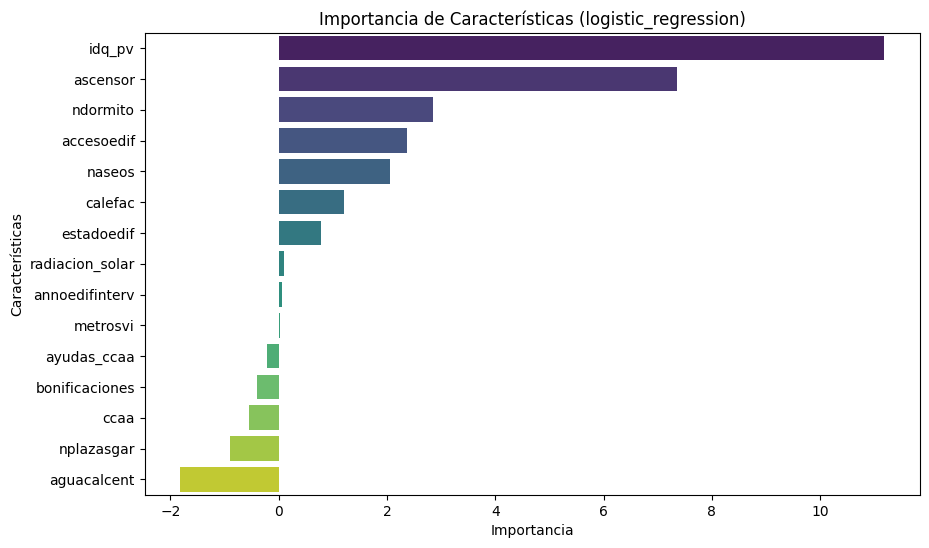

In [41]:
modelos_clasificacion.importancia_predictores("logistic_regression")

## RANDOM FOREST

### Modelo A

(Este es el que vamos a utilizar)

In [42]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "erfotov",train_size=0.8)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../../transformers/modelos",nombre_modelo_guardar="modelo_amplias_randomA_1.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [43]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.99,0.99,0.99,0.99,0.99,1.00
test,0.98,0.98,0.98,0.98,0.97,1.00


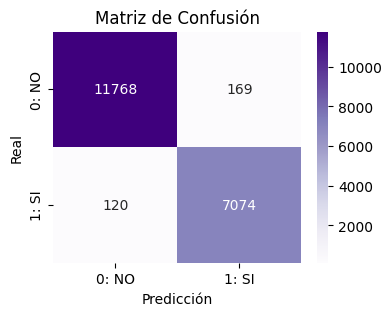

In [44]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

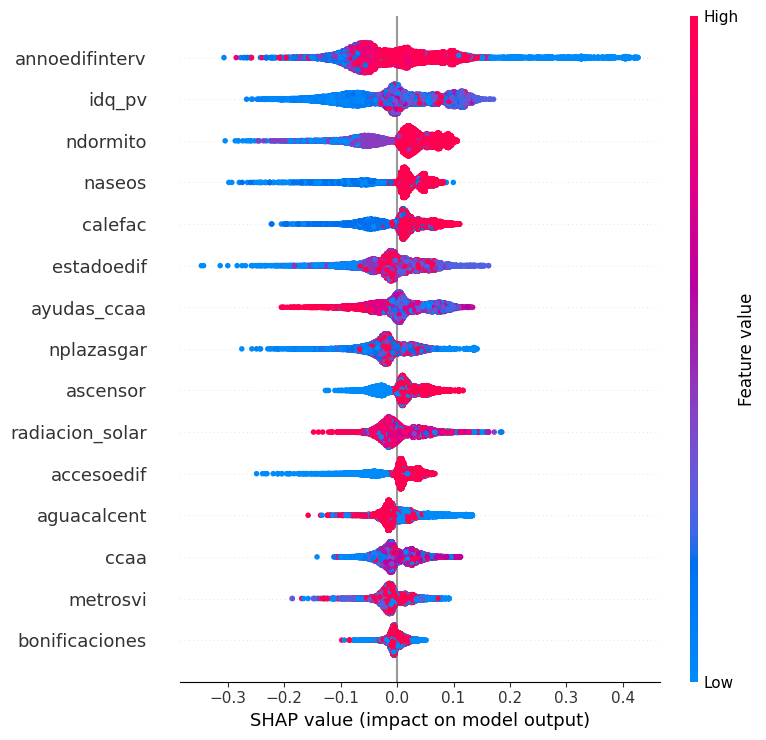

In [45]:
modelos_clasificacion.plot_shap_summary("random_forest")

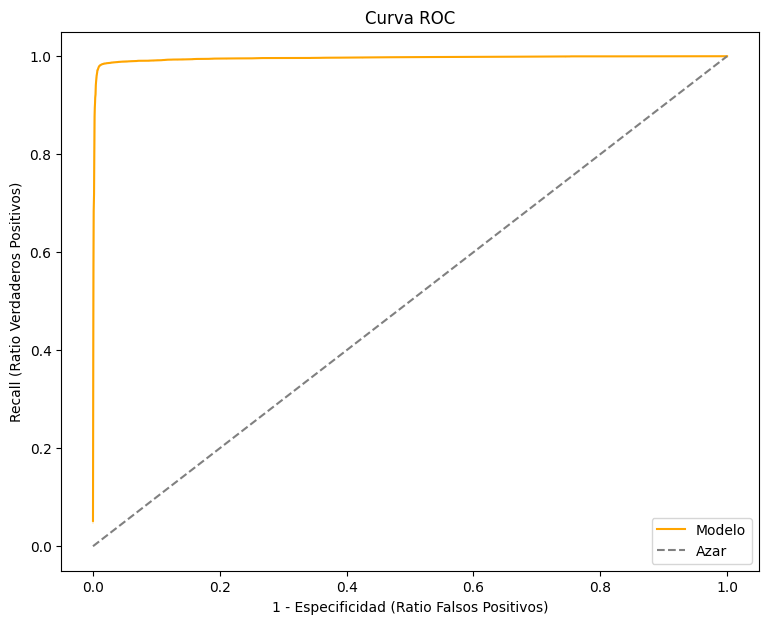

In [46]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

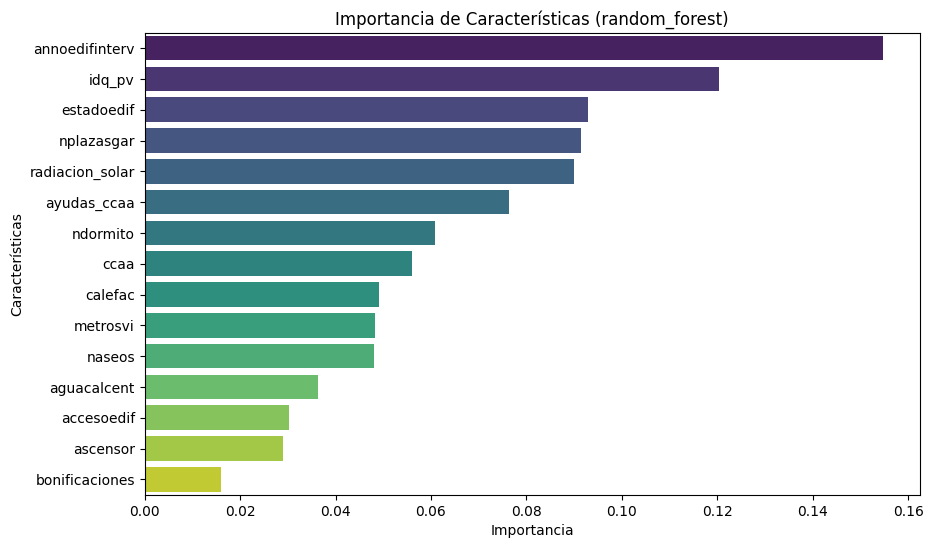

In [47]:
modelos_clasificacion.importancia_predictores("random_forest")

#### CON 0.7

### Modelo A.7

Probar a meter parametros para mejorar

In [48]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "erfotov",train_size=0.7)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../../transformers/desechar",nombre_modelo_guardar="modelo_amplias_randomA_1_7.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [49]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.99,0.99,0.99,0.99,0.99,1.00
test,0.98,0.98,0.98,0.98,0.97,1.00


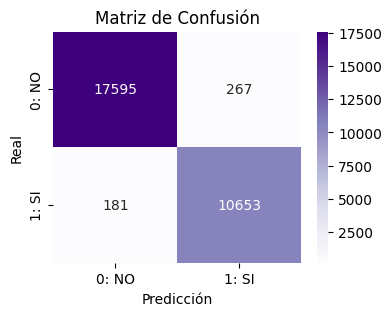

In [50]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

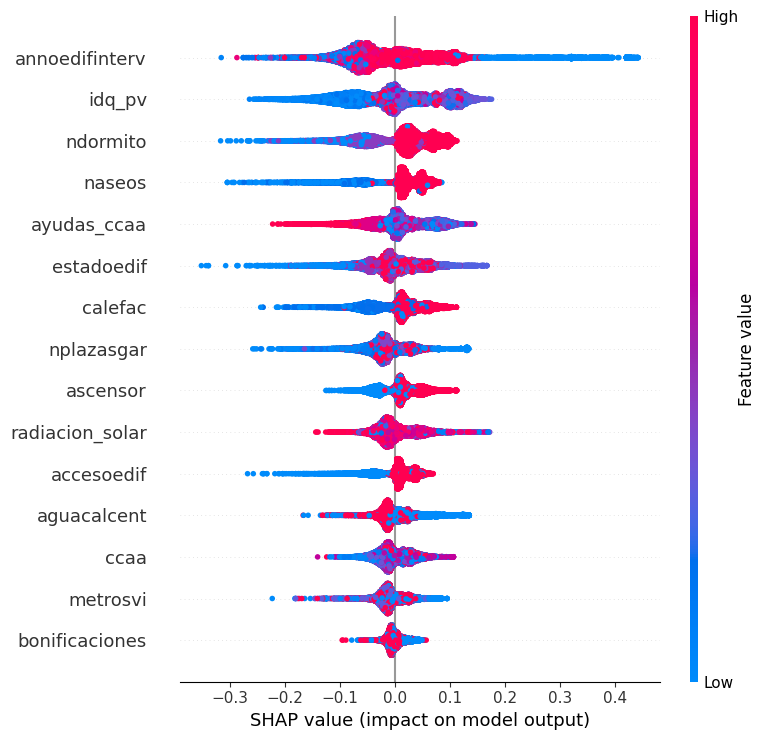

In [51]:
modelos_clasificacion.plot_shap_summary("random_forest")

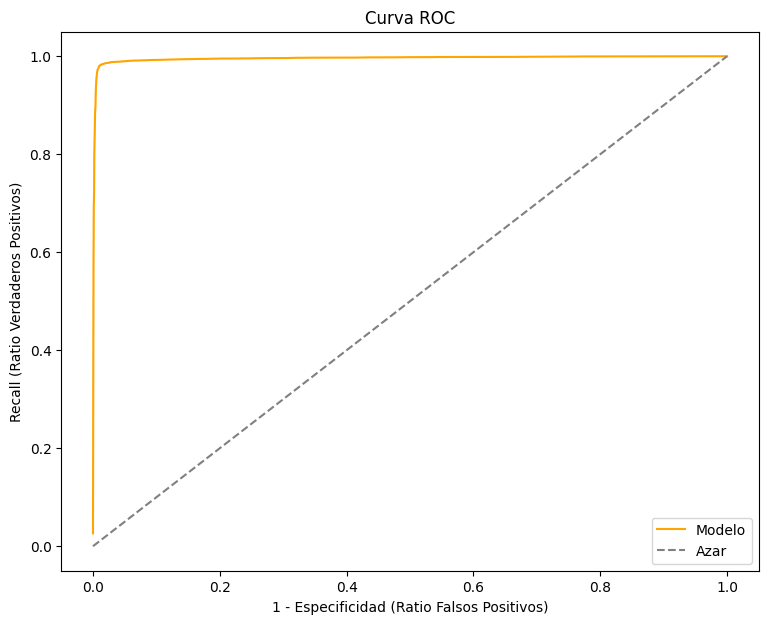

In [52]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

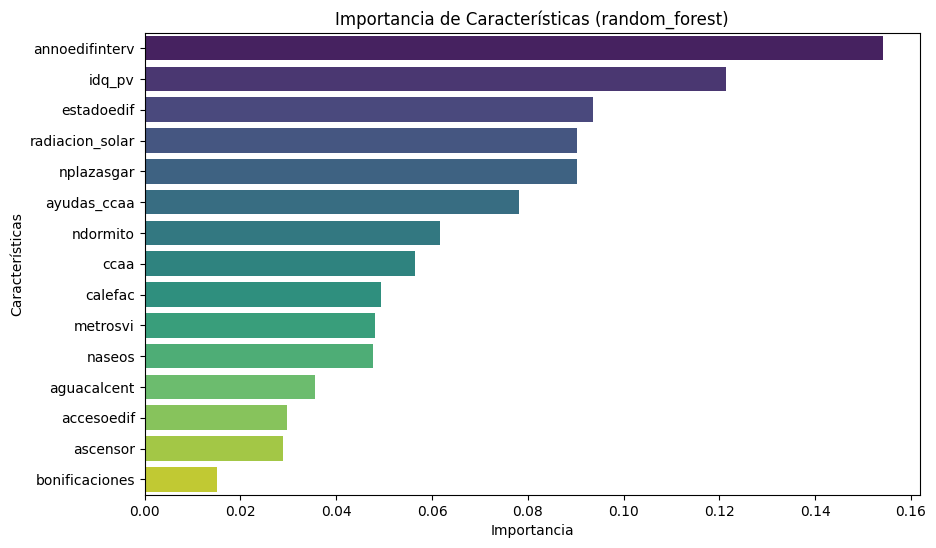

In [53]:
modelos_clasificacion.importancia_predictores("random_forest")

**PRUEBA DE DOBLE VALIDACIÓN**

In [54]:
modelos_clasificacion2=f.AnalisisModelosClasificacion2(df_preprocesado, "erfotov",train_ratio=0.8)
modelos_clasificacion2.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../../transformers/desechar",nombre_modelo_guardar="Val_modelo_amplias_randomA_2.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [55]:
modelos_clasificacion2.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.99,0.99,0.99,0.99,0.99,1.00
test,0.98,0.98,0.98,0.98,0.97,1.00
val,0.99,0.99,0.99,0.99,0.97,1.00


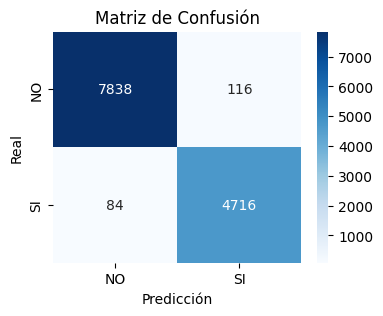

In [56]:
modelos_clasificacion2.plot_matriz_confusion("random_forest",conjunto="test", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

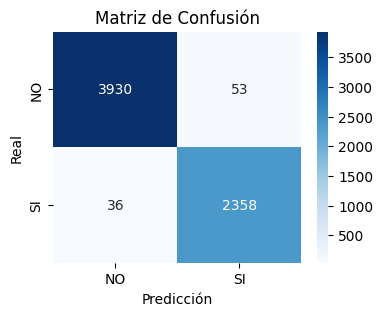

In [57]:
modelos_clasificacion2.plot_matriz_confusion("random_forest",conjunto="val", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

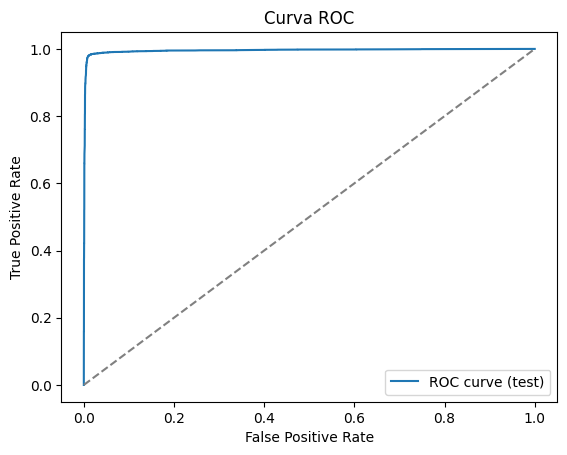

In [58]:
modelos_clasificacion2.plot_roc_curve( "random_forest", conjunto="test")

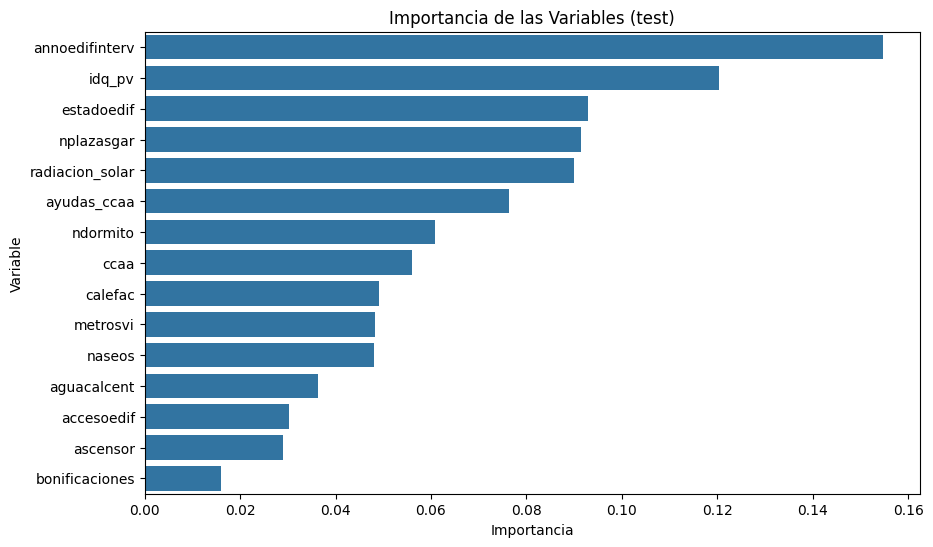

In [59]:
modelos_clasificacion2.plot_importancia_variables("random_forest",conjunto="test")

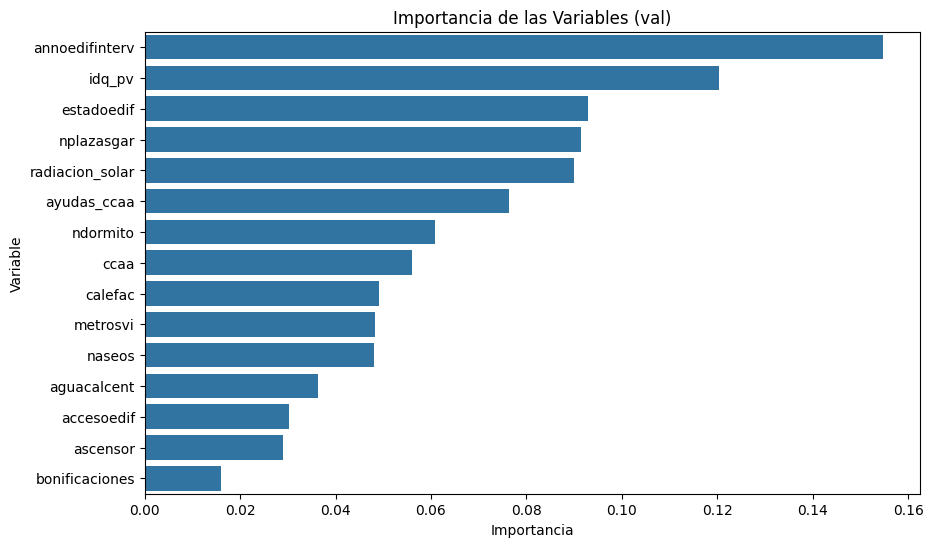

In [60]:
modelos_clasificacion2.plot_importancia_variables("random_forest",conjunto="val")

**Con esto confirmamos que el modelo es válido**

Observamosque las métricas son muy buenas y que estamos indiferentes entre usar train de 0.7 o de 0.8 por lo que tras haber probado otros, finalmente seleccionamos el Random Forest A.

| Modelo      | Recall (Train) | Recall (Test) | Overfitting (Diff Recall) | Kappa (Test) | AUC (Test) | F1 (Test) |
|-------------|----------------|---------------|---------------------------|--------------|------------|-----------|
| **Modelo R.Forest A**   | **0.99**           | **0.98**          | **0.01**                  | **0.97**     | **1.00**   |**0.98**     |
| **Modelo R.Forets A.7** | 0.99           | 0.98          | 0.01                  | 0.97         | 1.00       | 0.98      |
| **Modelo R.Log A**   | 0.69           | 0.69          | 0.00                  | 0.31         | 0.74       | 0.68      |
